## Исследование данных о российском кинопрокате



**Цель исследования:**
- Изучить рынок кинопроката России.
- Найти интересные тренды.
- Изучить динамику проката по годам.
- Выяснить влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.
- Выяснить, насколько фильмы с господдержкой интересны зрителю.

**Ход исследования**
1. Предобработка данных.
2. Исследовательский анализ данных.
3. Анализ фильмов с господдержкой.
4. Вывод

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#data = pd.read_csv('/datasets/mkrf_movies.csv', sep=',')
#data_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep=',')

try:
    path = r'C:\Data\\'
    data = pd.read_csv(path + 'mkrf_movies.csv', sep=',')
except:
    data = pd.read_csv('/datasets/mkrf_movies.csv', sep=',')

try:
    path = r'C:\Data\\'
    data_shows = pd.read_csv(path + 'mkrf_shows.csv', sep=',')
except:
    data_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep=',')

data.info()

def row_to_int(row):
    try:
        x = int(row)
        return x
    except:
        return 0

data['puNumber'] = data['puNumber'].apply(row_to_int)#переводит строку в целое число в столбце с номером удостоверения

data = data.merge(data_shows, on='puNumber', how='left')#соединяет таблицы без потери данных

data = data.query('puNumber != 0')#удаляет строки с пропусками в столбце с прокатным удостоверением

display(data.head(20))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [3]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')#переводит дату в понятный питону формат

def no_waiting(row):
    #если в значении есть символ %
    #возвращает слово 'waiting'
    try:
        if '%' in row:
            return 'waiting'
        else:
            return row
    except:
        return row


data['ratings'] = data['ratings'].apply(no_waiting)#применяет метод обнаружения рейтинга ожидания фильма вместо рейтинга
data = data.loc[data['ratings'] != 'waiting']#Убирает строки на которые сработал метод

data['ratings'] = data['ratings'].astype('float')#переводит рейтинг в дробное число



def string_to_list(row):
    #превращает строку с перечислением чего-либо через запятые в список из перечисленных значений
    try:
        if ',' not in row:
            return row
        else:
            return row.split(',')
    except:
        return row

#применяет функцию выше для всех столбцов с перечисляемыми значениями. Это нужно чтобы проще было изучать их далее.
data['film_studio'] = data['film_studio'].apply(string_to_list)
data['director'] = data['director'].apply(string_to_list)
data['producer'] = data['producer'].apply(string_to_list)
data['genres'] = data['genres'].apply(string_to_list)

data['box_office'] = data['box_office'].round(0)#Округляет число

data.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7456 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7456 non-null   object        
 1   puNumber               7456 non-null   int64         
 2   show_start_date        7456 non-null   datetime64[ns]
 3   type                   7456 non-null   object        
 4   film_studio            7438 non-null   object        
 5   production_country     7454 non-null   object        
 6   director               7447 non-null   object        
 7   producer               6888 non-null   object        
 8   age_restriction        7456 non-null   object        
 9   refundable_support     330 non-null    float64       
 10  nonrefundable_support  330 non-null    float64       
 11  budget                 330 non-null    float64       
 12  financing_source       330 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

- Столбцы, в которых мало пропусков, я удалю.
- Пропуски в столбце с продюсером заменю на режиссера, так как вероятнее всего пропуск означает что это один и тот же человек
- Отделю фильмы с господдержкой для дальнейшего анализа.

In [4]:
display(data.isna().sum())

data = data.dropna(subset=['film_studio','production_country','director'])#в этих столбцах мало пропусков, их можно просто удалить

data['producer'] = data['producer'].fillna('same')#готовим данные для функции produser_nans

def produser_nans(row):
    #возвращает имя режиссера если продюсер не указан
    producer = row['producer']
    director = row['director']
    try: 
        if producer == 'same':
            return director
        else:
            return producer
    except: return producer

data['producer'] = data.apply(produser_nans,axis = 1)#применяем функцию

data['not_budget'] = data['budget'].isna()# столбец с булевыми значениями для разделения фильмов с поддержкой и без

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   966
genres                    972
box_office               4313
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [5]:
display(data['puNumber'].value_counts().head(5))
display(data['title'].value_counts().head(5))
data = data.drop_duplicates(subset='title')
data = data.drop_duplicates(subset='puNumber')
display(data['puNumber'].value_counts().head(5))
display(data['title'].value_counts().head(5))

221154310    2
221054410    2
221048915    1
121010811    1
221049511    1
Name: puNumber, dtype: int64

День святого Валентина_    5
Красавчик-2                4
Непокоренный.              4
Химера                     4
Секс в большом городе 2    4
Name: title, dtype: int64

221048915    1
121022111    1
121005911    1
121017711    1
121017611    1
Name: puNumber, dtype: int64

Открытый простор                                1
Что скрывает ложь.                              1
Революция, я люблю тебя                         1
По версии Барни /По роману Мордехая Рихлера/    1
Живая сталь                                     1
Name: title, dtype: int64

Мною были найдены два задвоенных фильма. Причины их появления вероятнее всего кроются в ошибках при выгрузке.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Главная проблема - многие категориальные значения по сути являются списками. Это страны, студии, режиссеры и продюсеры. У большинства фильмов их несколько.

In [6]:
data['type'] = data['type'].str.strip()

display(data['type'].value_counts())

Художественный                5246
Анимационный                   765
Прочие                         383
Документальный                 272
Научно-популярный               49
Музыкально-развлекательный       1
Name: type, dtype: int64

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Значения этих двух столбцов уже включены в бюджет.

Подозрительные данные обнаружены в столбце сборов, их тип не соответствовал описанию и был исправлен мной ранее.

In [7]:
display(data.query('not_budget == False'))

display(data['budget'].describe())

display(data['budget'].value_counts().head())

data = data.query('budget!=0.0')
display(data['budget'].value_counts().head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,not_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"[АНО содействия развитию кинематографии ""Ангел...",Россия,А.Атанесян,"[А.Атанесян, М.Бабаханов, Р.Бутко]",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"[драма, мелодрама]",3.653540e+05,False
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,False
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"[Р.Давлетьяров, С.Комаров]","[Р.Давлетьяров, А.Котелевский, А.Олейников]",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"[комедия, фантастика]",1.995703e+07,False
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591800e+04,False
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"[А.Миндадзе, Л.Антонова]",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7456,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"[Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Ба...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,False
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"[А.Максимов, К.Эрнст]",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"[история, биография, драма]",7.177032e+08,False
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"[Д.Шмидт, К.Феоктистов]","[С.Сельянов, А.Боярский]",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"[мультфильм, приключения, семейный]",5.010692e+08,False
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,False


count    3.270000e+02
mean     1.257456e+08
std      1.843163e+08
min      0.000000e+00
25%      4.212625e+07
50%      6.880923e+07
75%      1.439456e+08
max      2.305074e+09
Name: budget, dtype: float64

0.0           17
38000000.0     6
50000000.0     4
80000000.0     4
37142857.0     3
Name: budget, dtype: int64

38000000.0    6
50000000.0    4
80000000.0    4
37142857.0    3
38500000.0    3
Name: budget, dtype: int64

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [8]:
data['rental_year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [9]:
def first_value(cell):
    #Делит список по запятым и возвращает первое значение в списке
    try:
        x = cell.split(',')
        return x[0]
    except:
        return cell

data['main_director'] = data['director'].apply(first_value)#Создает столбец с главным режиссером фильма
data['main_genre'] = data['genres'].apply(first_value)#Создает столбец с главным жанром фильма

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [10]:
data['percentage_of_support'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget'])
#Создает столбец в котором указанна доля господдержки от общего бюджета фильма

Качество данных в выгрузке удовлетворительное. Мною были удалены лишние отсутупы в ячейках, пропуски, неверные форматы данны и фильмы с рейтингом ожидания вместо обычного рейтинга.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Доля фильмов с указанной информацией о прокате: 45%


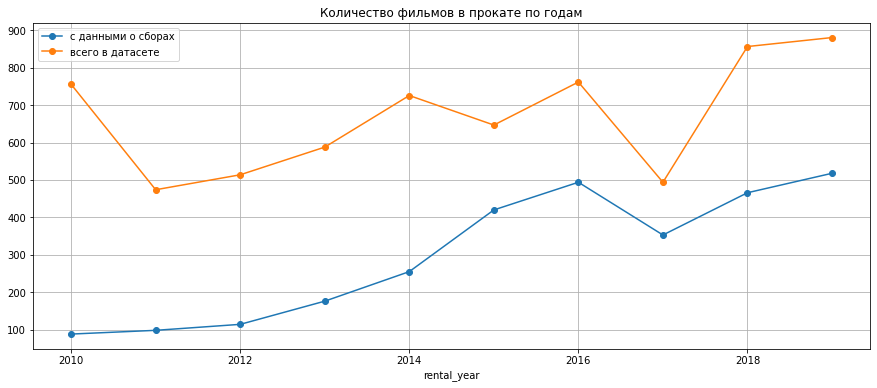

In [11]:
film_count = data['puNumber'].count()
box_data = data['box_office'].count()
box_share = (box_data / film_count).round(2)

print(f'Доля фильмов с указанной информацией о прокате: {box_share:.0%}')

year_pivot = data.pivot_table(index='rental_year', values=['puNumber','box_office'], aggfunc=['count'])#Таблица с количеством фильмов, имеющих данные о сборах и общим количеством фильмов в датасете
year_pivot.columns = ['с данными о сборах','всего в датасете']

plt.show(year_pivot.plot(style='o-', grid=True, figsize=(15, 6), title='Количество фильмов в прокате по годам'))
#year_data_pivot = data.pivot_table(index='rental_year', values='box')

<b>Данные о прокате известны для менее, чем половины фильмов. Причем их доля, будучи минимальной в 2010 году возрастала до 2017 года, после чего снова начала падать.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,с данными о сборах,всего в датасете,сумма сборов по годам,сборов на один фильм
rental_year,,,,
2010,88,756,2,0.022727
2011,98,474,14,0.142857
2012,114,514,6,0.052632
2013,176,588,30,0.170455
2014,255,726,7362,28.870588
2015,420,647,30584,72.819048
2016,494,762,42604,86.242915
2017,353,494,48456,137.269122
2018,466,857,47553,102.045064


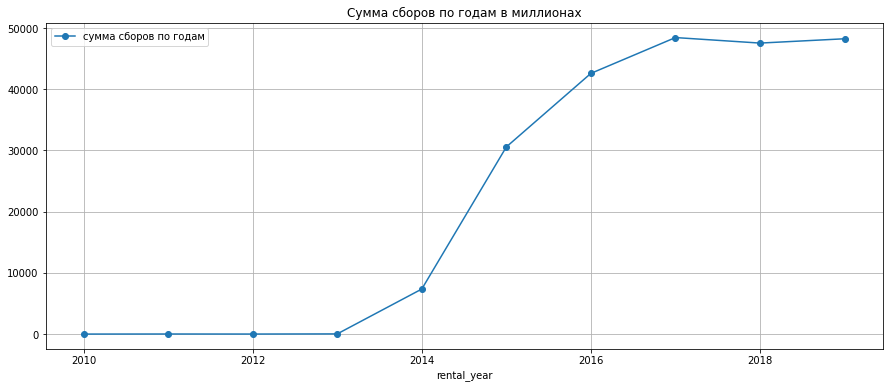

In [12]:
year_box_pivot = data.pivot_table(index='rental_year', values='box_office', aggfunc=['sum'])
year_box_pivot.columns = ['сумма сборов по годам']
year_box_pivot['сумма сборов по годам'] = (year_box_pivot['сумма сборов по годам'] / 1000000).round().astype('int')#Сумма сборов теперь указанна в миллионах рублей
year_pivot = year_pivot.join(year_box_pivot, on='rental_year', lsuffix='_left')#Добавляет в предыдущую таблицу сумму сборов
year_pivot['сборов на один фильм'] = year_pivot['сумма сборов по годам'] / year_pivot['с данными о сборах']
display(year_pivot)
year_pivot.plot(y = 'сумма сборов по годам', style='o-', grid=True, figsize=(15, 6), title='Сумма сборов по годам в миллионах');



С 10 по 14 год недостаточно данных и сумма сборов слишком маленькая. Сравнивать такие данные некорректно, так как в каждом году разное количество данных о сборах. 
Если не брать это во внимание и не учитывать года с 2010 по 2014, то максимальная сумма сборов была в 2017 году а минимальная в 2015.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

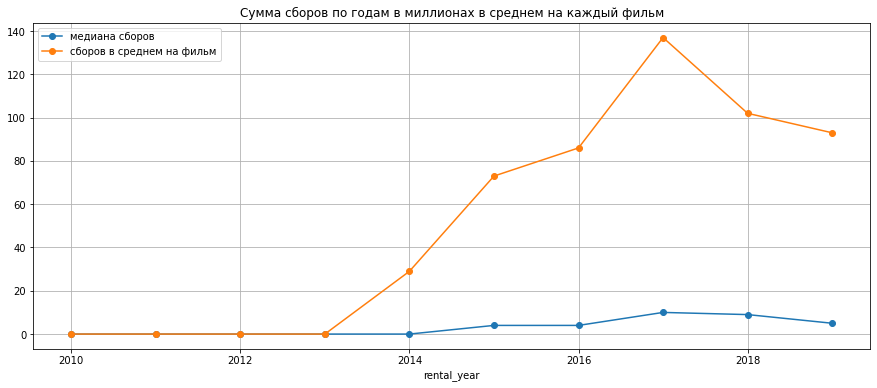

In [13]:
median_and_mean_box = data.pivot_table(index='rental_year', values='box_office', aggfunc=['median', 'mean'])#Медиана и среднее арифметическое сборов по годам
median_and_mean_box.columns = ['медиана сборов','сборов в среднем на фильм']
median_and_mean_box['медиана сборов'] = (median_and_mean_box['медиана сборов'] / 1000000).round().astype('int')#Рубли в миллионы рублей
median_and_mean_box['сборов в среднем на фильм'] = (median_and_mean_box['сборов в среднем на фильм'] / 1000000).round().astype('int')
#display(median_and_mean_box)

median_and_mean_box.plot(style='o-', grid=True, figsize=(15, 6), title='Сумма сборов по годам в миллионах в среднем на каждый фильм');



<b> На графике видно огромную пропасть между медианными и средними сборами. Это означает, что большинство фильмов собирают в прокате небольшие суммы и большая часть сборов обеспечивается единичными успешными блокбастерами.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

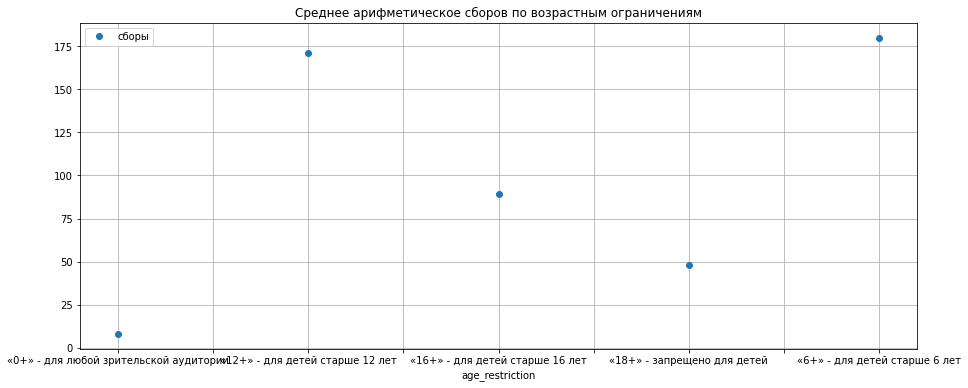

In [14]:
restriction_table = data.query('rental_year > 2014')#Отсекаем все до 2014 из-за недостатка данных

restriction_table = restriction_table.pivot_table(index='age_restriction', values='box_office', aggfunc='mean')
restriction_table['box_office'] = (restriction_table['box_office'] / 1000000).round().astype('int')
restriction_table.columns = ['сборы']


restriction_table.plot(title='Среднее арифметическое сборов по возрастным ограничениям', grid=True, figsize=(15, 6), style='o' );

Фильмы с низким возрастным рейтингом собирают в среднем в два раза больше денег в прокате чем с рейтингом 16+ и 18+

<Axes: title={'center': 'Сумма сборов по возрастным ограничениям'}, xlabel='age_restriction'>

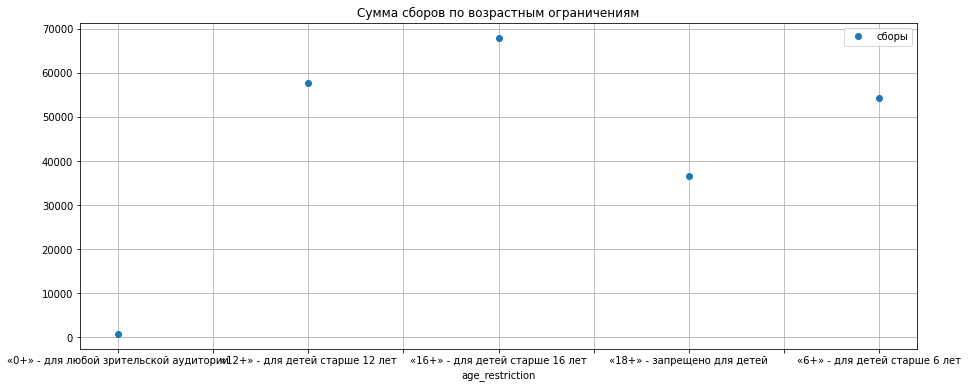

In [15]:
#сводная по ограничениям, данные - сборы
restriction_table_sum = data.query('rental_year > 2014')

restriction_table_sum = restriction_table_sum.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
restriction_table_sum['box_office'] = (restriction_table_sum['box_office'] / 1000000).round().astype('int')
restriction_table_sum.columns = ['сборы']

restriction_table_sum.plot(title='Сумма сборов по возрастным ограничениям', grid=True, figsize=(15, 6), style='o' )

На графике с суммой сборов расхождение между 16+ и 18+ намного нагляднее. Именно поэтому многие кинокомпании очень неохотно дают добро на фильмы 18+, они отсекают значительную часть аудитории.

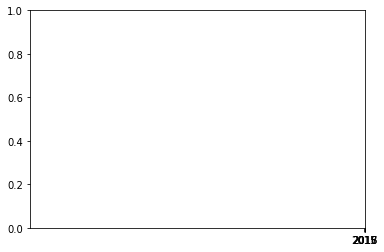

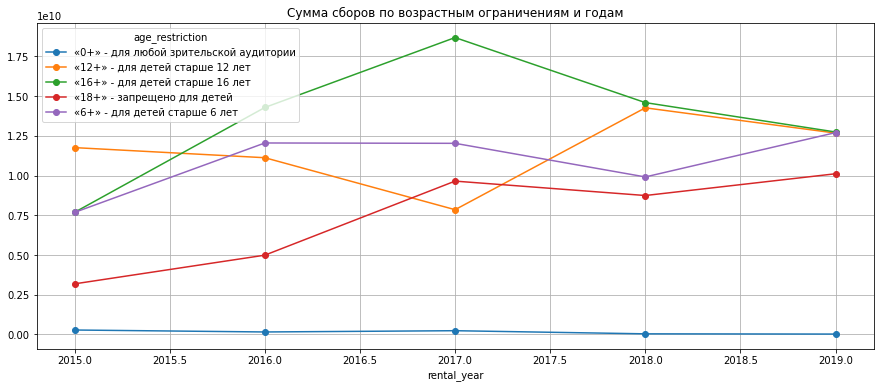

In [16]:
#таблица с графиками индекс-годы, столбцы-ограничения, данные-сборы сумма
restriction_table_sum_years = data.query('rental_year > 2014')
restriction_table_sum_years = restriction_table_sum_years.pivot_table(index='rental_year', columns='age_restriction', values='box_office',aggfunc='sum')
#display(restriction_table_sum_years)
plt.xticks(np.arange(2015, 2019, 1))
restriction_table_sum_years.plot(title='Сумма сборов по возрастным ограничениям и годам', grid=True, figsize=(15, 6), style='o-' );


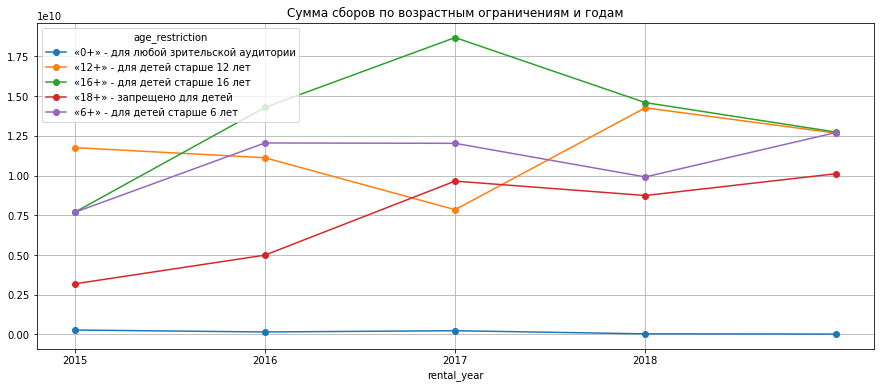

In [17]:

restriction_table_sum_years.plot(title='Сумма сборов по возрастным ограничениям и годам', grid=True, figsize=(15, 6), style='o-' )
plt.xticks(np.arange(2015, 2019, 1));

У фильмов 18+ и 6+ сборы за указанный период в целом растут. Фильмы 16+ показывали рост до 2017 года а после их сборы начали сильно падать. Возможно, это связанно с меньшим каличеством выходящих в этот год фильмов для соответствующей аудитории.
Фильмы 12+ наоборот, после 2017 года показывают рост.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Я выяснил:
- Какие количество от всех фильмов с господдержкой окупается?
- Насколько различается рейтинг фильмов с господдержкой от рейтинга фильмов не имеющих таковой?
- Сколько выделялось средств на поддержку кино каждый год и насколько в среднем они окупались?

In [18]:
data['payback'] = data['box_office'] / data['budget']
#display(data.query('not_budget == False'))
paid_off_movies = data.query('not_budget == False and payback > 1')
paid_off_movies = paid_off_movies['payback'].count()

non_purchased_movies = data.query('not_budget == False and payback < 1')
non_purchased_movies = non_purchased_movies['payback'].count()

no_data_movies = data.query('not_budget == False and (payback.isna()) and not (budget.isna())')
no_data_movies = no_data_movies['budget'].count()

display(f'Окупившихся фильмов с господдержкой:  {paid_off_movies}')
display(f'Неокупившихся фильмов с господдержкой:  {non_purchased_movies}')
display(f'Фильмы с господдержкой без данных о сборах:  {no_data_movies}')

payback_percentage = paid_off_movies / non_purchased_movies
display(f'Окупаются {payback_percentage:.0%} фильмов с господдержкой.')
no_data_percentage = no_data_movies / (paid_off_movies + non_purchased_movies)
display(f'О {no_data_percentage:.0%} фильмов с господдержкой в выгрузке отсутствует информация о сборах.')

'Окупившихся фильмов с господдержкой:  66'

'Неокупившихся фильмов с господдержкой:  231'

'Фильмы с господдержкой без данных о сборах:  13'

'Окупаются 29% фильмов с господдержкой.'

'О 4% фильмов с господдержкой в выгрузке отсутствует информация о сборах.'

In [19]:
average_rating = data.query('not_budget == True')
average_rating = round(average_rating['ratings'].mean(), 2)

support_rating = data.query('not_budget == False')
support_rating = round(support_rating['ratings'].mean(), 2)

display(f'Средний рейтинг фильмов без господдержки - {average_rating}, в то время как рейтинг фильмов с господдержкой - {support_rating}')

'Средний рейтинг фильмов без господдержки - 6.48, в то время как рейтинг фильмов с господдержкой - 6.01'

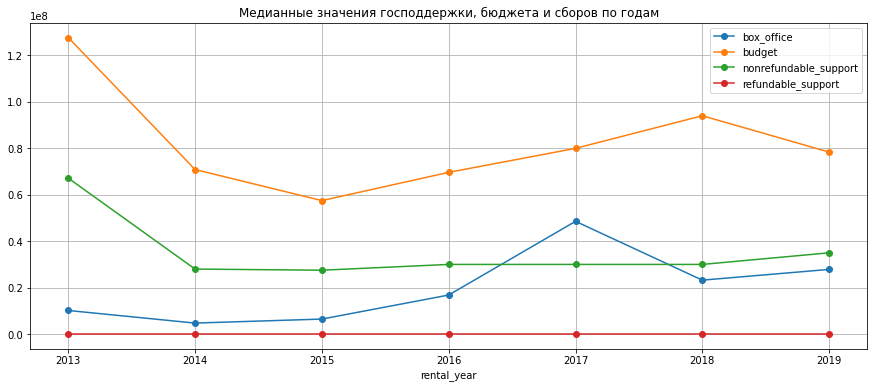

In [20]:
support_pivot = data.query('not_budget == False')
support_pivot = support_pivot.pivot_table(index='rental_year', values=['box_office','refundable_support','nonrefundable_support','budget'], aggfunc='median')
support_pivot.plot(title='Медианные значения господдержки, бюджета и сборов по годам', grid=True, figsize=(15, 6), style='o-' );

Я решил что целесообразнее посчитать медиану чтобы иметь картину, не включающую в себя выбросы от единичных блокбастеров. По ней видно что в среднем, фильмы не окупаются, даже несмотря на всё возрастающие бюджеты. А еще то, насколько невозвратная поддержка кино больше возвратной, и что в целом, от года к году, она остается на одном уровне.

### Шаг 5. Напишите общий вывод

В ходе исследования мною была совершена предварительная обработка данных (удалены пропущенные значения и дубликаты, исправлен тип данных там, где требуется).

Были добавлены новые столбцы с данными о наличии господдержки, годе выхода фильма в прокат, главном режиссере, главном жанре.

Изучены основные параметры и и распростроненность их значений. Построены графики. Сделаны промежуточные выводы и наблюдения.

Исследовано количество выходящих в прокат фильмов, сумма сборов фильмов по годам, а также влияние ограничений по возрасту на сборы фильмов.Так я выяснил, что фильмы с рейтингом 16+ потенциально в два раза прибыльнее фильмов 18+.  А сумма сборов с годами растет, но в основном за счет единичных блокастеров.

Проанализированны фильмы, получившие господдержку от государства. Из имеющихся данных можно сделать вывод о том, что хотя и в целом зрители довольны такими фильмами почти так же, как и остальными, окупается всего чуть более трети таких фильмов. Возможно потому, что таких фильмов слишком много, в среднем их сборов хватает на покрытие возвратной части господдержки, но не хватает на покрытие даже половины бюджета.
Рекомендуется тщательнее изучать и анализировать интересы зрителей, тщательне изучать сценарии и репутацию киностудий прежде чем оказывать финансовую поддежку фильмам.

